# Introduction
The data is collected from Free Music Archive (https://freemusicarchive.org/) and made available for download by 
Michaël Defferrard et al. The dataset has been organized as .csv's in multiple files depending on the category. Here I will look into the echonest.csv file to visualize continuous and categorical data in many ways.
<br>Here is a link to the github for inquiry and download
https://github.com/mdeff/fma
### Outline
1. Data Preparation
<br>A. Relevant/Missing Data
2. Visualization
<br>A. Choose one variable and plot that variable four different ways.
<br>B. Choose two continuous variables, and plot them three different ways.
<br>C. Choose one continuous variable and one categorical variable, and plot them six different ways.
<br>D. Create one master plot that gives insight into the variables and their interrelationships, including: probability distributions, bivariate relationships, whether the distributions or the relationships vary across groups
3. Remarks
<br>A. Future Research

# 1. Data Preparation
Import the necessary packages. Load the csv data into a pandas DataFrame.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import time

In [2]:
# edit file path if running in another workspace
echonest_path = 'fma_metadata/echonest.csv'
df = pd.read_csv(echonest_path, skiprows = (0,1,3))
# fix csv formatting to include track_id header
new_cols = df.columns.values
new_cols[0] = 'track_id'
df.columns = new_cols
# peek at the data
print ("Number of rows: {}".format(len(df.index)))
df[new_cols].head()

Number of rows: 13129


,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,album_date,...,214,215,216,217,218,219,220,221,222,223
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,NaN,...,-1.992303,6.805694,0.233070,0.192880,0.027455,0.06408,3.67696,3.61288,13.316690,262.929749
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,NaN,...,-1.582331,8.889308,0.258464,0.220905,0.081368,0.06413,6.08277,6.01864,16.673548,325.581085
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,NaN,...,-2.288358,11.527109,0.256821,0.237820,0.060122,0.06014,5.92649,5.86635,16.013849,356.755737
3,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590,2008-03-11,...,-3.662988,21.508228,0.283352,0.267070,0.125704,0.08082,8.41401,8.33319,21.317064,483.403809
4,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,NaN,...,-1.452696,2.356398,0.234686,0.199550,0.149332,0.06440,11.26707,11.20267,26.454180,751.147705


### A. Relevant/Missing Data
Not all the data is relevant, like the temporal features 000 to 223. We can drop these for visualization.
<br>Not all the data is present, so let's evaluate whether to keep those columns.

In [3]:
# drop temporal feature columns 27 to 250
df = df[new_cols[:26]]
# check out missing data
df_nans = df.isnull().sum()
df_zeros = (df == 0).sum()
df_missing = df_nans + df_zeros
# drop columns with more than 100 missing rows 
df_missing_keep = (df_missing < 100)
df_missing_keep_cols = df_missing.index[df_missing_keep].values
df = df[df_missing_keep_cols]
print ("Number of rows: {}".format(len(df.index)))
df.describe()

Number of rows: 13129


,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,artist_discovery,artist_familiarity,artist_hotttnesss
count,13129.000000,1.312900e+04,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000
mean,34031.058268,5.246876e-01,0.487290,0.537516,0.640536,0.187804,0.099174,123.080061,0.439761,0.321996,0.286287,0.346769
std,28950.422182,3.837186e-01,0.190148,0.278049,0.361430,0.158051,0.137381,35.015137,0.276028,0.114619,0.128304,0.133279
min,2.000000,9.035000e-07,0.051307,0.000020,0.000000,0.025297,0.022324,12.753000,0.000010,0.000000,0.000000,0.000000
25%,12986.000000,1.037726e-01,0.344759,0.321300,0.323466,0.101406,0.036932,95.967000,0.197321,0.254517,0.205872,0.265889
50%,28097.000000,5.739848e-01,0.485635,0.549113,0.838134,0.119002,0.049019,120.057000,0.417743,0.328672,0.284111,0.343653
75%,45021.000000,9.207270e-01,0.629094,0.776254,0.918244,0.211041,0.085452,145.318000,0.665575,0.414481,0.359271,0.451625
max,124911.000000,9.957965e-01,0.968645,0.999964,0.998016,0.980330,0.966177,251.072000,0.999990,0.667799,0.819393,0.808122


# 2. Visualization
Let's create some plots to explore the dataset. The goal here is to see what plotting techniques are the most effective at communicating information. It may turn out that no one plot represents the data the best, but rather presents different aspects of the data.
### A. Choose one variable and plot that variable four different ways.
Let's go with the first continuous variable: acousticness. To represent it in various ways, let's make a histogram, QQ plot, box plot, and a sorted scatter plot

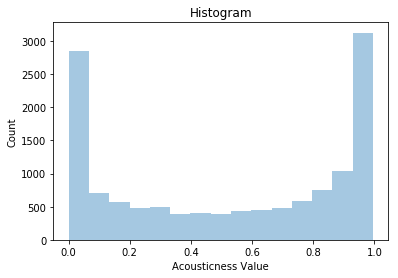

The histogram shows the distribution of acousticness values. Here, the values near 0 and near 1 are most common.
This indicates a binomial distribution.


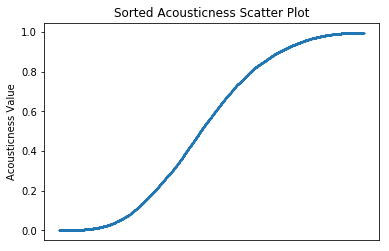

The sorted scatter plot is another way to show the distribution. Since this is a continuous variable, the scatter
plot represents a smooth line. Again, we can see that a majority of values are near 0 or near 1.


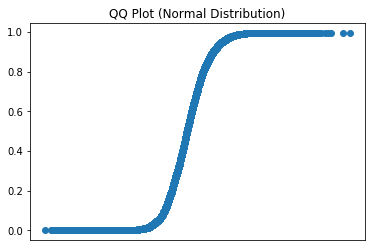

A QQ plot shows how similar our data is to a normal distribution. If the data was very similar to a normal
distribution, the line would have slope = 1. Here, we see something that looks like a sigmoid function.


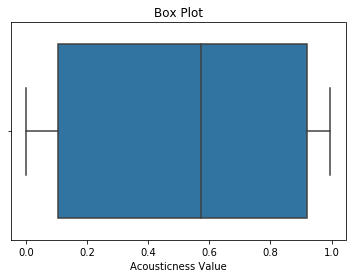

The box plot shows us that the median is around 0.55 and the upper and lower quartiles are 0.9 and 0.1,
respectively. Since the quartiles are so close to the range, this may indicate that the majority of values are near
0 or near 1. However, this does not show exactly how many values are clustered there, nor does it show the
distribution of such values.


In [4]:
# histogram
    # plot
acousticness = df['acousticness']
sns.distplot(acousticness, kde=False)
plt.title('Histogram')
plt.ylabel('Count')
plt.xlabel('Acousticness Value')
plt.show()
    # discussion
print ("The histogram shows the distribution of acousticness values. Here, the values near 0 and near 1 are most common.\nThis indicates a binomial distribution.")
# sorted scatter plot
    # plot
acousticness_sorted = np.sort(acousticness)
plt.scatter(range(len(acousticness_sorted)), acousticness_sorted, s = 0.2)
plt.title('Sorted Acousticness Scatter Plot')
plt.ylabel('Acousticness Value')
plt.xticks([])
plt.show()
    # discussion
print ("The sorted scatter plot is another way to show the distribution. Since this is a continuous variable, the scatter\nplot represents a smooth line. Again, we can see that a majority of values are near 0 or near 1.")

# QQ plot
    # plot
normal_dist= np.random.normal(0, 1, len(acousticness))
normal_dist.sort()
plt.plot(normal_dist, acousticness_sorted, "o")
plt.title('QQ Plot (Normal Distribution)')
plt.xticks([])
plt.show()
    # discussion
print ("A QQ plot shows how similar our data is to a normal distribution. If the data was very similar to a normal\ndistribution, the line would have slope = 1. Here, we see something that looks like a sigmoid function.")
# box plot
    # plot
sns.boxplot(acousticness)
plt.title('Box Plot')
plt.xlabel('Acousticness Value')
plt.show()
    # discussion
print ('The box plot shows us that the median is around 0.55 and the upper and lower quartiles are 0.9 and 0.1,\nrespectively. Since the quartiles are so close to the range, this may indicate that the majority of values are near\n0 or near 1. However, this does not show exactly how many values are clustered there, nor does it show the\ndistribution of such values.')

### B. Choose two continuous variables, and plot them three different ways. 
Let's see how energy and tempo relate. To do this, we can plot a bivariate scatter plot, a seaborn joint plot and binned boxplots.

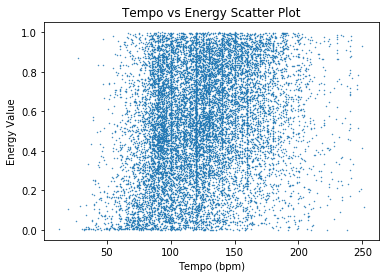

The scatter plot of tempo and energy shows the clustering of the relationship. Most energy values fall
between 75 and 175 bpm. A linear relationship may be present, but we would have to fit a linear regression line to
find out.


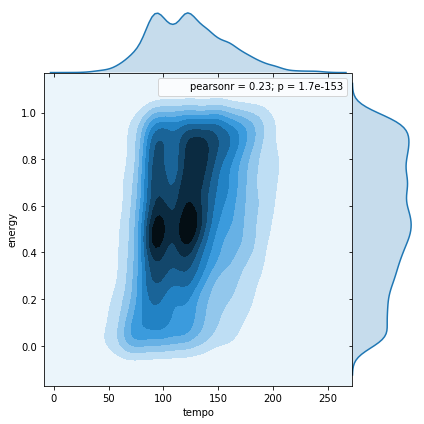

The seaborn joint plot shows a heat map of the scatter plot as well as the individual variables'
distributions. Tempo has a normal distribution with 2 peaks and energy has a slightly distorted normal distribution
with wide variance. The Pearson R value is 0.23 indicating a somewhat weak relationship between the
two variables. The very low p-value indicates that the two distributions are definitely unique.


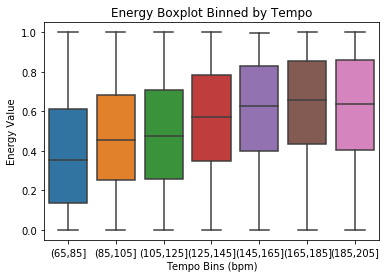

The range remains the same between each boxplot, but the median and interquartile ranges increase
with tempo. When arbitrarily binned, the regression of boxplots with tempo seem to have a strong relationship.
This is misleading, since the actual relationship is only weakly correlated.


In [5]:
tempo = df['tempo']
energy = df['energy']

# bivariate scatter plot
    # plot
plt.scatter(tempo, energy, s = .2)
plt.title('Tempo vs Energy Scatter Plot')
plt.xlabel('Tempo (bpm)')
plt.ylabel('Energy Value')
plt.show()
    # discussion
print ("The scatter plot of tempo and energy shows the clustering of the relationship. Most energy values fall\nbetween 75 and 175 bpm. A linear relationship may be present, but we would have to fit a linear regression line to\nfind out.")

# joint plot
    # plot
sns.jointplot(tempo, energy, kind = 'kde', space = 0)
plt.show()
    # discussion
print ("The seaborn joint plot shows a heat map of the scatter plot as well as the individual variables'\ndistributions. Tempo has a normal distribution with 2 peaks and energy has a slightly distorted normal distribution\nwith wide variance. The Pearson R value is 0.23 indicating a somewhat weak relationship between the\ntwo variables. The very low p-value indicates that the two distributions are definitely unique.")

# binned box plot
    # bin energy values
buckets = list(range(65,186,20))
df_bin_energy = pd.DataFrame()
for bucket in buckets:
    temp_energy = df[df['tempo'] >= bucket]
    temp_energy = temp_energy[temp_energy['tempo'] < (bucket + 20)]
    temp_energy.reset_index(inplace = True)
    column_name = '(' + str(bucket) + ',' + str(bucket + 20) + ']'
    df_bin_energy[column_name] = temp_energy['energy']
    # plot
sns.boxplot(data = df_bin_energy)
plt.title('Energy Boxplot Binned by Tempo')
plt.xlabel('Tempo Bins (bpm)')
plt.ylabel('Energy Value')
plt.show()    
    # discussion
print ("The range remains the same between each boxplot, but the median and interquartile ranges increase\nwith tempo. When arbitrarily binned, the regression of boxplots with tempo seem to have a strong relationship.\nThis is misleading, since the actual relationship is only weakly correlated.")

### C. Choose one continuous variable and one categorical variable, and plot them six different ways.
Even though artist_name has almost 3000 unique values, it can still serve as our categorical variable. Let's see if we can identify which artists have singers with the speechiness feature of their songs. In order to show this, we'll use these six plots: number of unique artists, point plot, top 10 boxplot, sorted bar plot of average speechiness per artist, alphabetical scatter plot

In [6]:
# artist counts
artist_counts = df['artist_name'].value_counts()
print ("Number of unique artists: {}".format(len(artist_counts)))
# speechiness Series per artist
start = time.time()
df_speechiness = pd.DataFrame(columns = artist_counts.index.values)
for artist in artist_counts.index.values:
    temp_df = df[df['artist_name'] == artist]
    temp_df.reset_index(inplace = True)
    df_speechiness[artist] = temp_df['speechiness']
end = time.time()
print ("loop time: {} seconds".format(end - start))
print (len(df_speechiness.index))
# top 10 most popular artists
top_10_speechiness = df_speechiness[list(artist_counts.index.values[:10])]
print (top_10_speechiness.columns)

Number of unique artists: 2872
loop time: 9.533032894134521 seconds
94
Index(['Big Blood', 'Roger McGuinn', 'Vernon LeNoir', 'CM aka Creative',
       'Glove Compartment', 'Just Plain Ant', 'Blah Blah Blah',
       'THF Drenching', 'Gorowski', 'Monk Turner'],
      dtype='object')


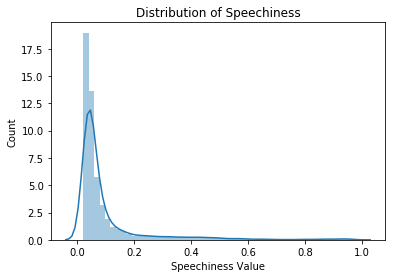

A vast majority of songs have near 0 speechiness. The distribution is half normal since the minimum is 0.


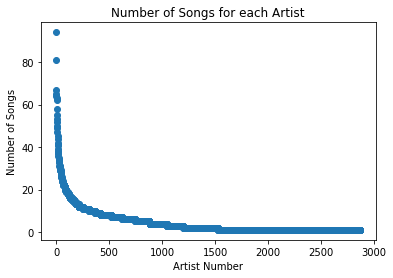

Only a few artists have a high number of songs in this dataset. Once the number of songs falls below 10,
there are increasingly more artists who have that number of songs. Since the majority of speechiness values
are near 0 and the majority of artists only have a few songs in the dataset, maybe the majority of artists
in the dataset have low speechiness?


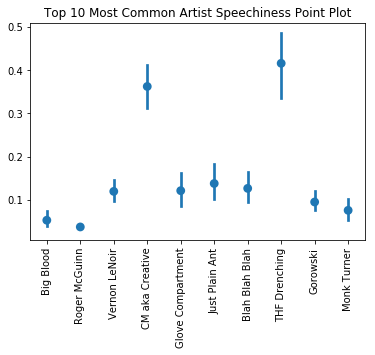

This point plot shows the mean speechiness as a point with standard error as a verical line. Most artists
in the top 10 have very low speechiness and small standard error. The two that stand out are
'CM aka Creative' with a mean of 0.35 and 'THF Drenching' with a mean of 0.4. Considering the distribution of
speechiness above, these values are significantly higher than the majority of artists.


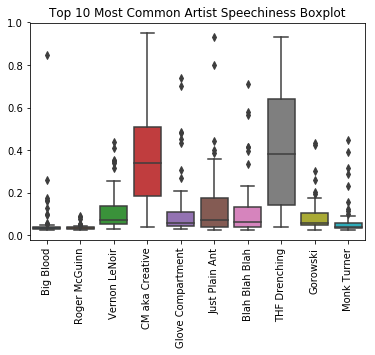

While the point plot only shows mean, the box plot can show the full range of speechiness. Here, we can
see that, although the mean (and median) are low, the full range of speechiness does stretch near the limits.
These artists, therefore, have variety in the speechiness of their songs.


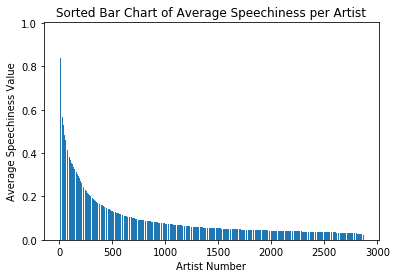

This plot resembles the histogram of spechiness for all songs with a few key differences. First, there are
only a few artists with a very high average speechiness. Second, The central tendency is lower than the
histogram's.


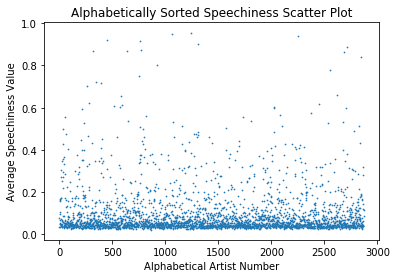

Just for intrigue, let's see if artist name is related to average speechiness. Looks like the answer is no.


In [20]:
# speechiness distribution
    # plot
sns.distplot(df['speechiness'])
plt.title('Distribution of Speechiness')
plt.xlabel('Speechiness Value')
plt.ylabel('Count')
plt.show()
    # discussion
print ("A vast majority of songs have near 0 speechiness. The distribution is half normal since the minimum is 0.")
    
# number of unique artists
    # plot
plt.scatter(range(len(artist_counts)), artist_counts)
plt.xlabel('Artist Number')
plt.ylabel('Number of Songs')
plt.title('Number of Songs for each Artist')
plt.show()
    # discussion
print ("Only a few artists have a high number of songs in this dataset. Once the number of songs falls below 10,\nthere are increasingly more artists who have that number of songs. Since the majority of speechiness values\nare near 0 and the majority of artists only have a few songs in the dataset, maybe the majority of artists\nin the dataset have low speechiness?")
    
# top 10 point plot
    # plot
sns.pointplot(data = top_10_speechiness, join = False)
plt.title('Top 10 Most Common Artist Speechiness Point Plot')
plt.xticks(rotation = 'vertical')
plt.show()
    # discussion
print ("This point plot shows the mean speechiness as a point with standard error as a verical line. Most artists\nin the top 10 have very low speechiness and small standard error. The two that stand out are\n'CM aka Creative' with a mean of 0.35 and 'THF Drenching' with a mean of 0.4. Considering the distribution of\nspeechiness above, these values are significantly higher than the majority of artists.")
    
# top 10 box plot
    # plot
sns.boxplot(data = top_10_speechiness)
plt.title('Top 10 Most Common Artist Speechiness Boxplot')
plt.xticks(rotation='vertical')
plt.show()
    # discussion
print ("While the point plot only shows mean, the box plot can show the full range of speechiness. Here, we can\nsee that, although the mean (and median) are low, the full range of speechiness does stretch near the limits.\nThese artists, therefore, have variety in the speechiness of their songs.")
    
# sorted bar chart: average speechiness per artist
speechiness_mean = df_speechiness.mean(axis = 0)
speechiness_mean_sorted = speechiness_mean.sort_values(ascending = False)
    # plot
plt.bar(range(len(speechiness_mean.index)), speechiness_mean_sorted)
plt.title('Sorted Bar Chart of Average Speechiness per Artist')
plt.xlabel('Artist Number')
plt.ylabel('Average Speechiness Value')
plt.show()
    # discussion
print ("This plot resembles the histogram of spechiness for all songs with a few key differences. First, there are\nonly a few artists with a very high average speechiness. Second, The central tendency is lower than the\nhistogram's.")

# alphabetical mean scatter plot
speechiness_alpha_sort = pd.DataFrame()
speechiness_alpha_sort['average_speechiness'] = speechiness_mean
speechiness_alpha_sort['artist_name'] = df_speechiness.columns
speechiness_alpha_sort.sort_values(by = ['artist_name'], inplace = True)
    # plot
plt.scatter(range(len(speechiness_alpha_sort.index)), speechiness_alpha_sort['average_speechiness'], s=0.5)
plt.title('Alphabetically Sorted Speechiness Scatter Plot')
plt.xlabel('Alphabetical Artist Number')
plt.ylabel('Average Speechiness Value')
plt.show()
    # discussion
print ("Just for intrigue, let's see if artist name is related to average speechiness. Looks like the answer is no.")

### D. Create one master plot that gives insight into the variables and their interrelationships, including: probability distributions, bivariate relationships, whether the distributions or the relationships vary across groups
Let's start with a correlation heatmap to see the reduced relationship between each numeric variable. Then we'll plot an array of plots to see the deeper relationship between each numeric variable. Finally, we'll see if the top 10 most common artists have anything in common.